BY: **RIYA JOSHI**

EMAIL: riya.joshi@somaiya.edu



---


### **Basic idea behind Linear Regression algorithm**:

*   Linear Regression algorithm helps us to determine the strength and relationship between variables, where one variable is dependent and others are called independent variable/s.
*   The case of one independent variable is called simple linear regression; for more than one, the process is called multiple linear regression.





### **Applications of linear regression**:
* Prediction
* Error reduction
* To quantify the strength of the relationship between the response and the explanatory variables.




---




In [100]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('players_20.csv') #importing dataset
df.head() # displaying first five records

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [102]:
df.shape # in the form of (rows,cols)

(18278, 72)

In [103]:
df.describe() # to display different statistical measures of the dataset

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2021.00000

In [104]:
df.info() # to display full summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    182

In [105]:
# checking for NaN values if any
print(df.isna().sum())

sofifa_id                  0
player_url                 0
short_name                 0
long_name                  0
age                        0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 72, dtype: int64


In [106]:
# finding out columns with null values
df.columns[df.isnull().any()].tolist()

['release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits']

In [107]:
# replacing null values with 0
df = df.fillna(value= 0)

In [108]:
# Shuffling dataset ( to remove any biases in the dataset if any )
df = df.sample(frac=1)

For simple regression we need two variables X ( independent variable ) and Y ( dependent variable ) . So, from this dataset I'll be choosing **potential** attribute as X and **overall** attribute as Y. 

* Overall attribute basically gives us the overall score of the player
* Potential attribute tells us about the score that the player is capable of scoring.


### splitting dataset into train and test

In [109]:
# splitting dataset into 70:30 ratio

# Defining train size
train_size = int(0.7 * len(df))

# Splitting dataset
train_set = df[:train_size]
test_set = df[train_size:]

# **Simple linear regression**

### Equation is : y=w0 + w1*x  
* where X is the independent variable and it is plotted along the x-axis
* Y is the dependent variable and it is plotted along the y-axis
* w0 and w1 are the coefficents , basically intercept and slope of the line 


---



Formula for calculating coefficients 

> `w1 = Σ[(xi - x_mean)(yi - y_mean)]/Σ[(xi - x_mean)^2 ]`

> `w0 = y_mean - (w1 * x_mean)`




* Where xiand yi are the data points of the X and Y attributes
* And x_mean and y_mean are the mean values of X and Y attributes

### **Algorithm**

In [110]:
def simple_linear_regression(dataset,X,Y):

  # here the dataset parameter can be train dataset or test dataset ( we had earlier split our original dataset into train and test )
  # X, Y are the attributes of the dataset that are to be used for simple linear regression

  # Values method : Only the values in the DataFrame will be returned, the axes labels will be removed.
  X_values = dataset[X].values 
  Y_values = dataset[Y].values

  # calculating mean for X , Y attributes
  x_mean = np.mean(X_values)
  y_mean = np.mean(Y_values)

  # total values 
  n=len(X_values)

  # caluculating w1 
  numerator = 0
  denominator = 0

  for i in range(n):

    numerator += (X_values[i] - x_mean)* (Y_values[i] - y_mean)
    denominator += (X_values[i] - x_mean) **2 

  w1 = numerator / denominator

  # calculating w0
  w0 = y_mean - (w1 * x_mean)

  # predicted response 
  Y_predicted = w0 + w1*X_values

  ans=[X_values, Y_values, Y_predicted, w0, w1]

  return ans

### Visualizing the regression line and scatter plot of train set

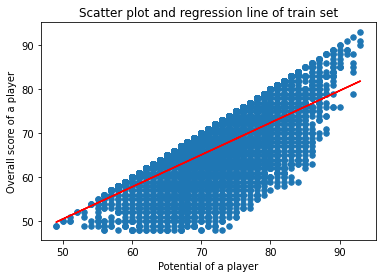

In [111]:
ans_train = simple_linear_regression(train_set,'potential','overall')

plt.scatter(ans_train[0],ans_train[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_train[0],ans_train[2],color="red")

plt.title('Scatter plot and regression line of train set')
plt.xlabel('Potential of a player')
plt.ylabel('Overall score of a player')
plt.show()


### Visualizing the regression line and scatter plot of test set



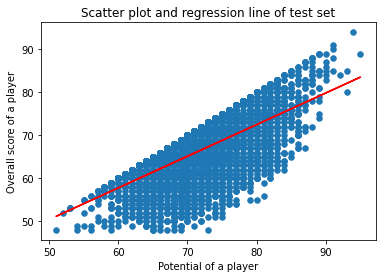

In [112]:
ans_test = simple_linear_regression(test_set,'potential','overall')

plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_test[0],ans_test[2],color="red")

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Potential of a player')
plt.ylabel('Overall score of a player')
plt.show()


### Predicting value using test set

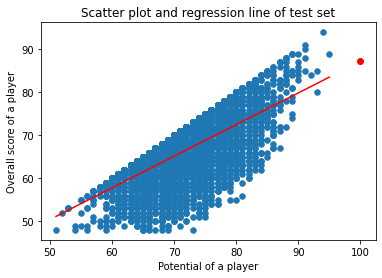

In [113]:
x = np.linspace(np.max(ans_test[0]),np.min(ans_test[0]),100) # Linspace :  is used to create an evenly spaced sequence in a specified interval.
y = ans_test[3] + ans_test[4]*x # predicting responses 

# predicting overall ( i.e score of a player) if  we assume potential of a person to be 100
x1=100
y1=ans_test[3]+ans_test[4]*x1
plt.plot(x1,y1,'ro') # plotting that single point

# plotting the regression line
plt.plot(x,y,color="red")

# scatter plot
plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Potential of a player')
plt.ylabel('Overall score of a player')
plt.show()



### Finding accuracy of the model  using **Mean absolute error** , **Mean squarred error** and **Root mean squarred error** ( doing on test set  )

In [114]:
# mean absolute error
def MAE():
  mae_sum = 0
  for y_,x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mae_sum += abs(y_ - prediction)
  mae = mae_sum / len(ans_test[1])

  return mae

# mean squared error
def MSE():
  mse_sum = 0
  for y_, x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mse_sum += (y_ - prediction)**2
  mse = mse_sum / len(ans_test[1])

  return mse

# root mean squared error
def RMSE():
  return MSE()**0.5

In [115]:
print("Mean absolute error : ",MAE())
print("Mean squarred error : ",MSE())
print("Root mean squared error : ",RMSE())

Mean absolute error :  4.377910504211239
Mean squarred error :  28.003225834892024
Root mean squared error :  5.291807426096685


# **Multiple linear regression**  ( using matrix algebra )

For Multiple Linear Rregression I'll be using 'potential','age','international_reputation' as X variables and 'overall' as Y

### **Generalized formulae** :
* ###  Y=Xb 
* ###  Multiply both sides with XT ( X transpose )
* ### XTY = XTXb	or	XTXb = XTY
* ### Multiply both sides by the inverse of XTX
* ### ( XTX)-1 XTXb = ( XTX)-1 XTY
* ### since ( XTX)-1 XTX = I ( identity matrix )
* ### b = (XTX)-1 XTY



In [116]:
# making a new column 'temp' and assigning all the values in that col as 1
train_set['temp']=1
test_set['temp']=1

### **Algorithm**

In [117]:
def multiple_linear_regression(dataset, X_attribute_list, Y):

  # here the dataset parameter can be train dataset or test dataset ( we had earlier split our original dataset into train and test )
  # X_attribute_list , Y are the attributes of the dataset that are to be used for multiple linear regression

  # Values method : Only the values in the DataFrame will be returned, the axes labels will be removed.
  X_values=dataset[X_attribute_list].values
  Y_values=dataset[Y].values

  X_values_T = X_values.transpose() # STEP 1: evaluating X transpose

  inverse=np.linalg.inv(np.matmul(X_values_T,X_values)) # STEP 2: evaluating inverse of matrix multplication of ( X transpose and X ) 

  other_prod=np.matmul(X_values_T,Y_values) # STEP 3: evaluating matrix multiplication of X transpose and Y 

  b=np.matmul(inverse,other_prod) # STEP 4: evaluating matrix multiplication of the inverse calculated in STEP 2 and result of STEP 3

  ans = [X_values, Y_values, b]

  return ans


### Visualizing the scatter plot of train set

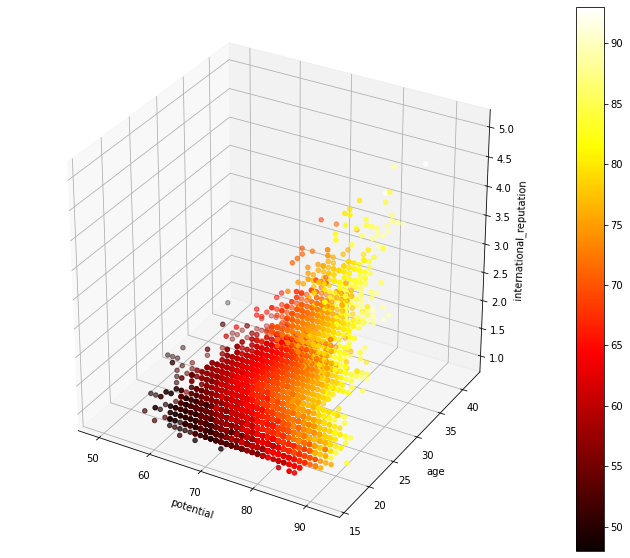

In [118]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')

x_1 = train_set['potential']
x_2 = train_set['age']
x_3 = train_set['international_reputation']
x_4= train_set['overall']

ax.set_xlabel("potential")
ax.set_ylabel("age")
ax.set_zlabel("international_reputation")

img=ax.scatter(x_1, x_2, x_3,c=x_4,cmap=plt.hot())
fig.colorbar(img)
plt.show()

### Visualizing scatter plot of test set

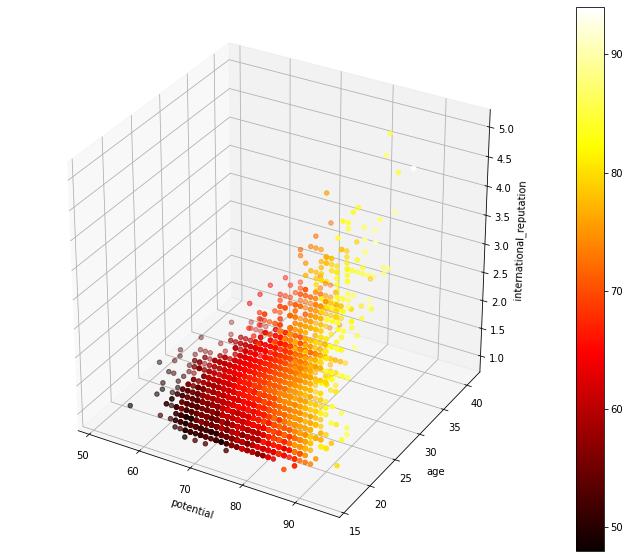

In [119]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')

x_1 = test_set['potential']
x_2 = test_set['age']
x_3 = test_set['international_reputation']
x_4=  test_set['overall']

ax.set_xlabel("potential")
ax.set_ylabel("age")
ax.set_zlabel("international_reputation")

img=ax.scatter(x_1, x_2, x_3,c=x_4,cmap=plt.hot())
fig.colorbar(img)
plt.show()

### Predicting response variable or overall score by taking random values

In [120]:
ans = multiple_linear_regression(test_set, ['temp','potential','age','international_reputation'], 'overall')

x_new = np.linspace(np.max(ans[0]),np.min(ans[0]),len(ans[1]))
y_test_pred_multiple = np.matmul(ans[0],ans[2])

print("predicted test values : ",y_test_pred_multiple)

predicted test values :  [64.02158306 71.61259038 61.50083846 ... 70.20640322 58.94573474
 67.27978036]


In [121]:
# assuming potential of the player = 94 , age = 30 , international_reputation=4

y_new_prediction=np.matmul([1,94,30,4],ans[2])
print("over all score prediction : ",y_new_prediction)

over all score prediction :  92.77276687054949


### Finding accuracy of the model  using **Mean absolute error** , **Mean squarred error** and **Root mean squarred error** ( doing on test set  )

In [122]:
# mean absolute error
def MAE():
  mae_sum = 0
  for i in range(len(ans[1])):
      prediction=np.matmul(ans[0][i],ans[2])
      mae_sum += abs(ans[1][i]- prediction)
  mae = mae_sum / len(ans[1])

  return mae

# mean squared error
def MSE():
  mse_sum = 0
  for i in range(len(ans[1])):
      prediction=np.matmul(ans[0][i],ans[2])
      mse_sum += (ans[1][i] - prediction)**2
  mse = mse_sum / len(ans[1])

  return mse

# root mean squared error
def RMSE():
  return MSE()**0.5

In [123]:
print("Mean absolute error : ",MAE())
print("Mean squarred error : ",MSE())
print("Root mean squared error : ",RMSE())

Mean absolute error :  2.147140164534872
Mean squarred error :  7.32811786356716
Root mean squared error :  2.70704966034374
